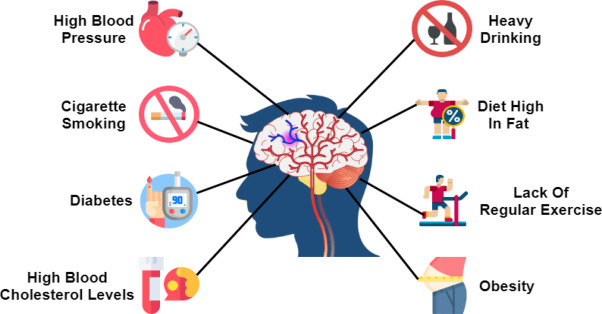

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
df.shape

(5110, 12)

# data cleaning

In [47]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
df.dropna(inplace = True)

In [41]:
df.drop('id', axis = 1,inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [42]:
scaler = StandardScaler()
label = LabelEncoder()

In [43]:
# feature target selection

x = df.drop('stroke', axis = 1)
y = df['stroke']

In [35]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

In [44]:
for column in categorical_columns:
    x[column] = label.fit_transform(x[column])
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])    

In [45]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42) 
x_train.shape, x_test.shape

((3927, 10), (982, 10))

In [48]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3565,0,-0.127052,0,0,1,2,1,-0.890034,0.293733,2
898,0,0.715415,0,0,1,3,1,-0.532761,0.497470,0
2707,0,0.626734,0,0,1,2,1,2.523533,0.981345,2
4198,1,1.690903,0,0,1,3,1,-0.768242,-0.635817,1
2746,1,0.981457,0,0,1,3,1,-0.212183,-0.050073,2


In [49]:
y_train.head()

3565    0
898     0
2707    0
4198    0
2746    0
Name: stroke, dtype: int64

In [50]:
dt = DecisionTreeClassifier(criterion='gini',min_samples_split= 3, min_samples_leaf = 3,random_state=42)

In [51]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=42)

In [52]:
#train accuracy
dt.score(x_train, y_train)

0.977336389101095

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
y_pred = dt.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9195519348268839

In [69]:
con = confusion_matrix(y_test, y_pred)
con

array([[896,  33],
       [ 46,   7]])

<Axes: >

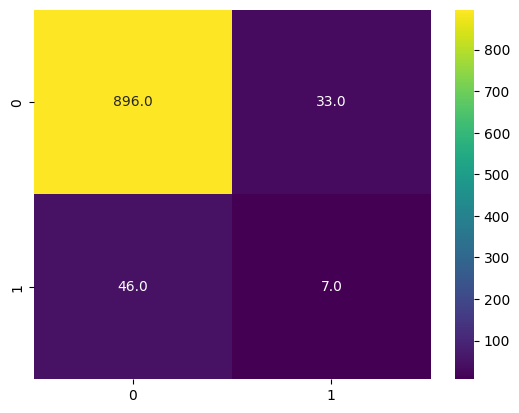

In [68]:
#confusion matrix
sns.heatmap(con, cmap = 'viridis', annot = True, fmt = '.1f')

# Visualization

In [72]:
df['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

<Axes: xlabel='stroke'>

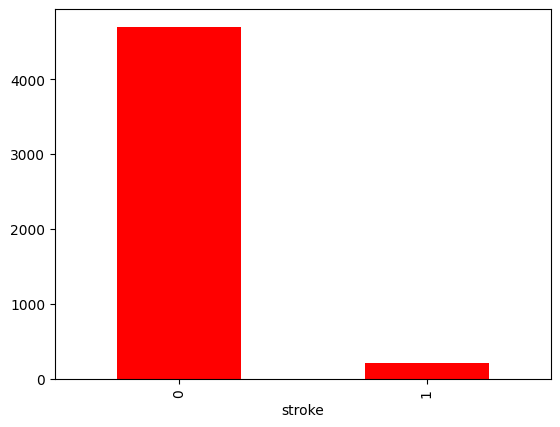

In [86]:
df['stroke'].value_counts().plot(kind = 'bar', color = 'r')

In [74]:
df.groupby('gender')['avg_glucose_level'].mean()

gender
Female    103.329914
Male      108.131721
Other     143.330000
Name: avg_glucose_level, dtype: float64

<Axes: xlabel='work_type', ylabel='avg_glucose_level'>

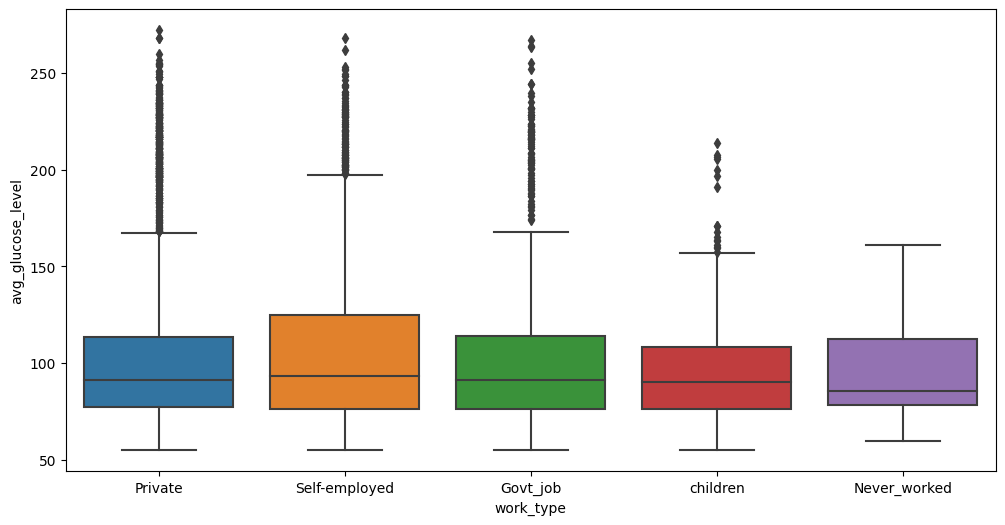

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'work_type' , y  = 'avg_glucose_level' , data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Count'>

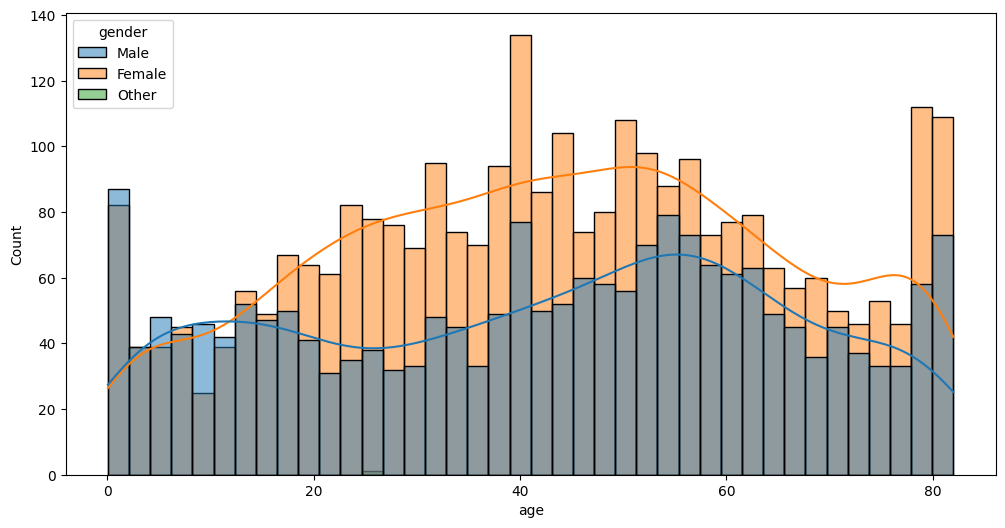

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'age', data =df, bins = 40, kde = True, hue = 'gender')

<Axes: xlabel='Residence_type', ylabel='bmi'>

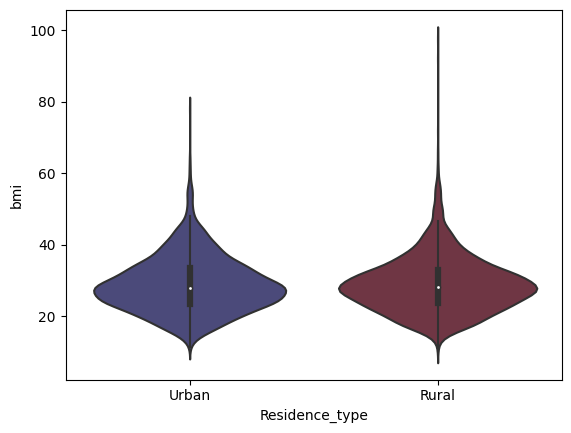

In [96]:
sns.violinplot(x = 'Residence_type', y = 'bmi', data =df, palette = 'icefire')

<Axes: xlabel='gender', ylabel='bmi'>

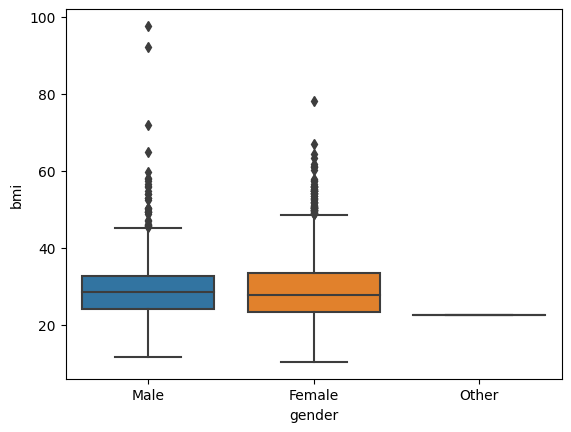

In [97]:
sns.boxplot(x = 'gender', y = 'bmi', data = df)